In [43]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential

data, metadata = tfds.load("citrus_leaves", with_info=True, split='train', shuffle_files=True)
batched_data = data.batch(32)

In [4]:
import matplotlib.pyplot as plt

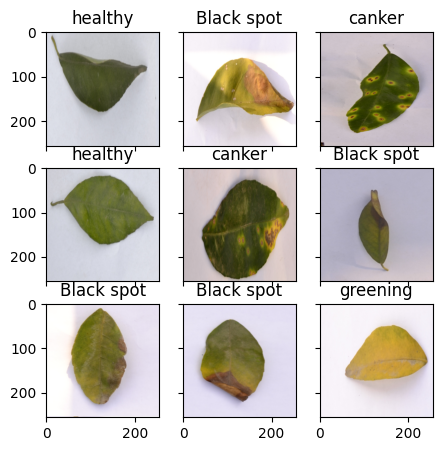

In [10]:
# Take one batch fromthe dataset and display the images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5, 5))

for sample in batched_data.take(2):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
      ax[i][j].set_title(metadata.features["label"].int2str(labels[i*3+j]))

plt.show()

In [13]:
out_height, out_width = 128,256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3) # how random it should be
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)
flip = tf.keras.layers.RandomFlip('horizontal_and_vertical')
rotate = tf.keras.layers.RandomRotation(0.3)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8, 0.8])
contrast = tf.keras.layers.RandomContrast(0.2)

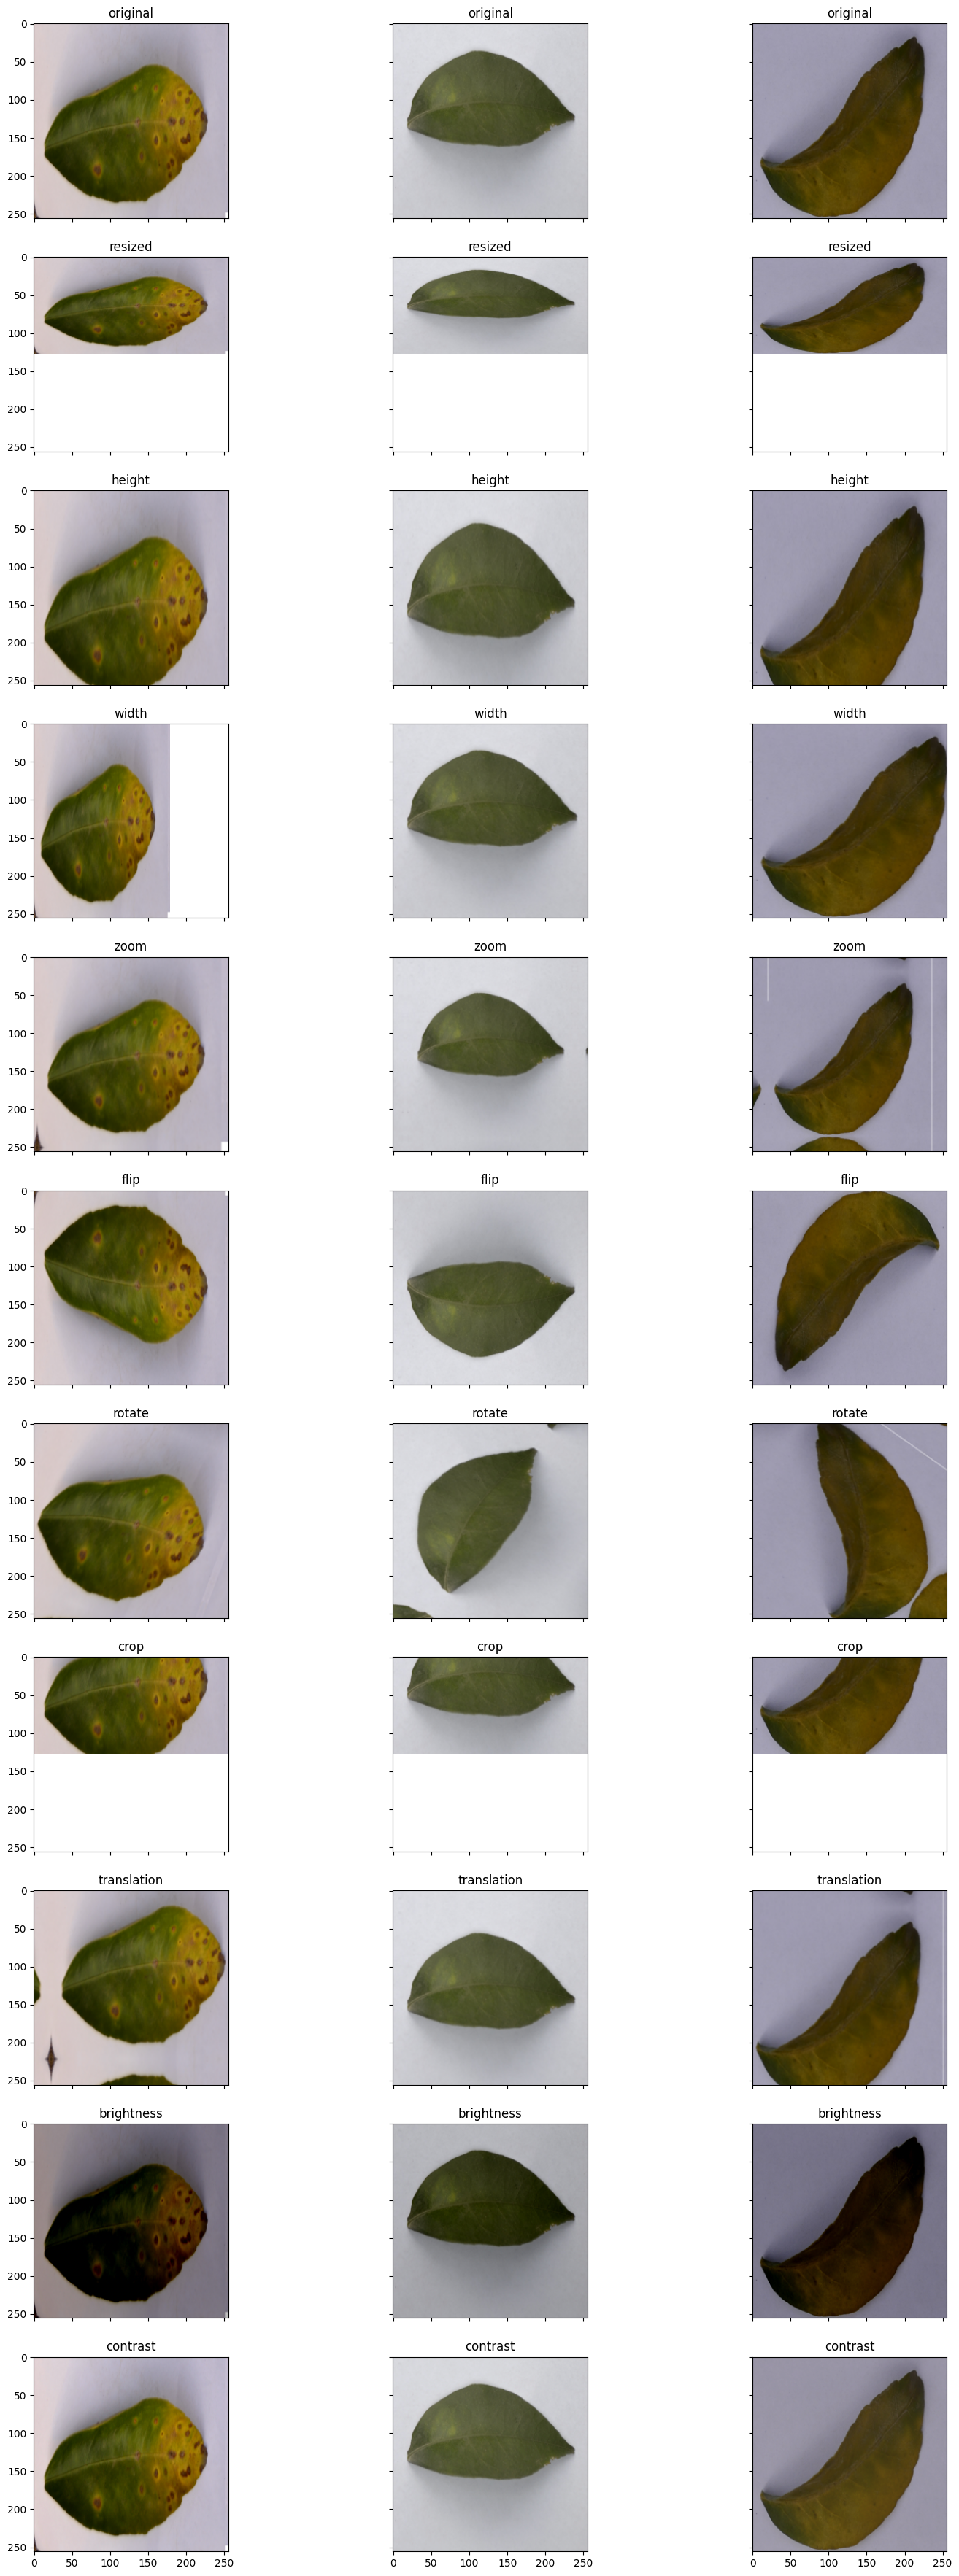

In [38]:
fig, ax = plt.subplots(11, 3, sharex=True, sharey=True, figsize=(18,45))

for sample in batched_data.take(1):
  images, labels = sample["image"], sample["label"]
  for i in range(3):
      ax[0][i].imshow(images[i].numpy().astype("uint8"))
      ax[0][i].set_title('original')
      # resize
      ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
      ax[1][i].set_title('resized')
      # height
      ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
      ax[2][i].set_title('height')
      # width
      ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
      ax[3][i].set_title('width')
      # zoom
      ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
      ax[4][i].set_title('zoom')
      # flip
      ax[5][i].imshow(flip(images[i]).numpy().astype("uint8"))
      ax[5][i].set_title('flip')
      # rotate
      ax[6][i].imshow(rotate(images[i]).numpy().astype("uint8"))
      ax[6][i].set_title('rotate')
      # crop
      ax[7][i].imshow(crop(images[i]).numpy().astype("uint8"))
      ax[7][i].set_title('crop')
      # translation
      ax[8][i].imshow(translation(images[i]).numpy().astype("uint8"))
      ax[8][i].set_title('translation')
      # brightness
      ax[9][i].imshow(brightness(images[i]).numpy().astype("uint8"))
      ax[9][i].set_title('brightness')
      # contrast
      ax[10][i].imshow(contrast(images[i]).numpy().astype("uint8"))
      ax[10][i].set_title('contrast')

plt.show()

array([[[190, 188, 203],
        [156, 152, 176],
        [160, 156, 179],
        ...,
        [161, 158, 178],
        [157, 154, 175],
        [191, 189, 203]],

       [[191, 189, 203],
        [158, 154, 176],
        [160, 156, 178],
        ...,
        [160, 157, 177],
        [156, 153, 175],
        [191, 189, 203]],

       [[191, 189, 203],
        [156, 154, 175],
        [160, 157, 178],
        ...,
        [160, 157, 178],
        [157, 154, 176],
        [191, 189, 203]],

       ...,

       [[166, 163, 182],
        [167, 164, 183],
        [166, 163, 182],
        ...,
        [160, 157, 178],
        [156, 153, 173],
        [190, 188, 201]],

       [[166, 163, 184],
        [167, 164, 183],
        [167, 164, 183],
        ...,
        [161, 158, 178],
        [157, 154, 174],
        [190, 188, 201]],

       [[166, 163, 184],
        [166, 163, 183],
        [166, 163, 184],
        ...,
        [161, 158, 178],
        [157, 154, 174],
        [191, 189, 203]]], dtype=uint8)
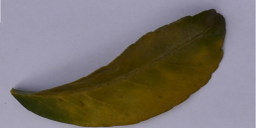

In [31]:
resize(images[i].numpy().astype("uint8")).numpy().astype("uint8")

array([[[190, 188, 203],
        [156, 152, 176],
        [160, 156, 179],
        ...,
        [161, 158, 179],
        [157, 154, 176],
        [191, 189, 203]],

       [[190, 188, 203],
        [157, 153, 176],
        [161, 157, 180],
        ...,
        [161, 158, 178],
        [157, 154, 175],
        [191, 189, 203]],

       [[191, 189, 202],
        [158, 154, 176],
        [160, 156, 178],
        ...,
        [160, 157, 177],
        [156, 153, 175],
        [191, 189, 204]],

       ...,

       [[166, 163, 184],
        [167, 164, 183],
        [167, 164, 183],
        ...,
        [161, 158, 178],
        [157, 154, 174],
        [190, 188, 201]],

       [[166, 163, 184],
        [166, 163, 184],
        [166, 163, 184],
        ...,
        [162, 159, 178],
        [157, 154, 174],
        [191, 189, 202]],

       [[166, 163, 184],
        [166, 163, 183],
        [167, 164, 184],
        ...,
        [161, 158, 178],
        [158, 155, 175],
        [192, 190, 204]]], dtype=uint8)
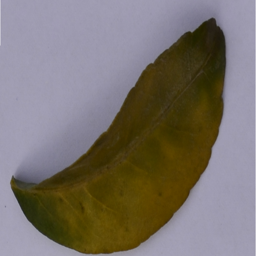

In [30]:
images[i].numpy().astype("uint8")

In [44]:
model = Sequential()
model.add(tf.keras.layers.RandomFlip())
model.add(tf.keras.layers.RandomCrop(128, 256))
model.add(tf.keras.layers.Conv2D(32, (3,3)))